In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")
from scipy.stats import ttest_ind, spearmanr

df = pd.read_csv('analytics_test.csv', index_col=False)
df.head(20)

,Unnamed: 0,user_id,sex,age,platform,query_id,query_text,query_type,event,click_position,doc_type,view_time
0,0,96422511,female,68,android,89656828,передачи о новых технологиях,show,share,6,playlist,0
1,1,45247030,male,62,android_tv,89784877,автопрому новости,news,search,0,NaN,0
2,2,79572413,male,12,web,10555855,логистическое законодательство,news,search,0,NaN,0
3,3,821317,female,58,android_tv,72054848,банковские премии новости,news,search,0,NaN,0
4,4,6206023,female,24,android,20838049,вики шоу аманда,show,subscribe,7,author,0
5,5,8004249,anonym,0,android,19760211,как купить билеты на Грибов,music,tap,1,author,0
6,6,11617125,female,66,android_tv,59650610,5+1 шоу парень бедный,show,subscribe,8,video,0
7,7,79473329,anonym,0,smart_tv,569617620,биография Мэрилин Монро,films,tap,5,clip,0
8,8,17370723,anonym,0,android,46720550,поездка или поездочка шоу истории,show,subscribe,9,video,0
9,9,30126713,female,29,web,29645901,автозаконодательство новости,news,view,2,clip,183


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Unnamed: 0      20000 non-null  int64 
 1   user_id         20000 non-null  int64 
 2   sex             20000 non-null  object
 3   age             20000 non-null  int64 
 4   platform        20000 non-null  object
 5   query_id        20000 non-null  int64 
 6   query_text      20000 non-null  object
 7   query_type      20000 non-null  object
 8   event           20000 non-null  object
 9   click_position  20000 non-null  int64 
 10  doc_type        15042 non-null  object
 11  view_time       20000 non-null  int64 
dtypes: int64(6), object(6)
memory usage: 1.8+ MB


In [5]:
df.shape

(20000, 12)

In [6]:
df.describe()

,Unnamed: 0,user_id,age,query_id,click_position,view_time
count,20000.000000,2.000000e+04,20000.000000,2.000000e+04,20000.000000,20000.000000
mean,9999.500000,4.940472e+07,30.029600,1.629075e+08,6.216150,614.775450
std,5773.647028,2.896590e+07,22.588294,2.443505e+08,6.389262,2217.290922
min,0.000000,1.273000e+03,0.000000,8.758000e+03,0.000000,0.000000
25%,4999.750000,2.405560e+07,11.000000,3.215079e+07,0.000000,0.000000
50%,9999.500000,4.946180e+07,30.000000,6.425107e+07,4.000000,0.000000
75%,14999.250000,7.429182e+07,50.000000,9.664634e+07,10.000000,0.000000
max,19999.000000,9.999570e+07,69.000000,9.998612e+08,30.000000,17994.000000


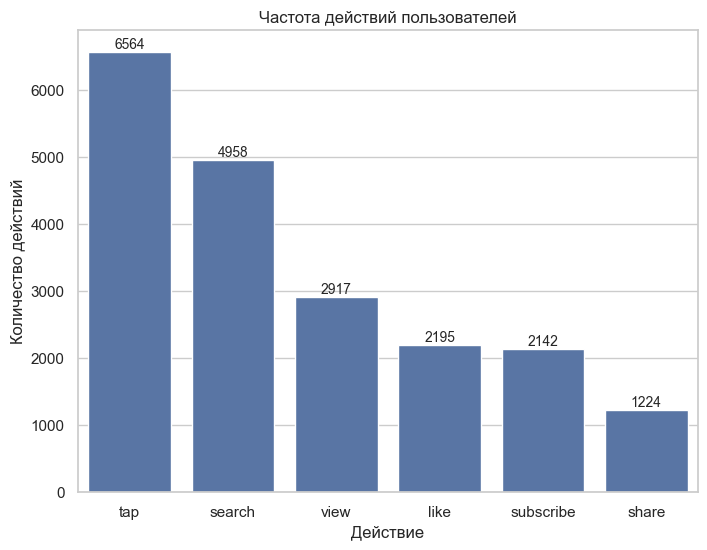

In [7]:
event_counts = df['event'].value_counts()

# Визуализация
plt.figure(figsize=(8, 6))
ax = sns.barplot(x=event_counts.index, y=event_counts.values)
ax.bar_label(ax.containers[0], fontsize=10)
plt.title('Частота действий пользователей')
plt.xlabel('Действие')
plt.ylabel('Количество действий')
plt.show()

## Из графика частоты действий пользователей делаем вывод, что чаще поиск приводит к нажатию на результат или к действию search. Посмотрим сколько запросов делают пользователи и рассмотрим поток их действий

In [8]:
queries_per_user = df.groupby('user_id')['query_id'].nunique()
actions_per_query = df.groupby('query_id')['event'].count()

print(f"Среднее количество запросов на пользователя: {queries_per_user.mean():.2f}")
print(f"Среднее количество действий на запрос: {actions_per_query.mean():.2f}")

Среднее количество запросов на пользователя: 1.17
Среднее количество действий на запрос: 1.09


## В среднем пользователь делает всего 1.17 запросов, что очень маловероятно, но может быть в учебном датасете

In [9]:
user_queries_duplicated = df[df['user_id'].duplicated(keep=False)]
us = user_queries_duplicated.groupby(['user_id'])['event'].value_counts().sort_values(ascending=False)
unstacked_us = us.unstack()
unstacked_us

event,like,search,share,subscribe,tap,view
user_id,,,,,,
34723,NaN,2.0,NaN,NaN,NaN,NaN
70859,NaN,NaN,NaN,NaN,1.0,1.0
76099,1.0,NaN,1.0,NaN,NaN,NaN
84809,NaN,2.0,NaN,NaN,NaN,NaN
87246,1.0,NaN,NaN,1.0,NaN,NaN
...,...,...,...,...,...,...
99896130,NaN,2.0,NaN,NaN,NaN,NaN
99926914,1.0,NaN,NaN,NaN,1.0,NaN
99945401,NaN,2.0,NaN,NaN,NaN,NaN


In [10]:
df[df['user_id'] == 76099]

,Unnamed: 0,user_id,sex,age,platform,query_id,query_text,query_type,event,click_position,doc_type,view_time
3837,3837,76099,female,20,web,35635839,белый шум для сна,music,like,1,author,0
13503,13503,76099,male,20,web,285086708,русские фильмы про войну,films,share,2,video,0


## После группировки данных по пользователям и подсчету их действий ожидал увидеть, что типы дейсвтий 'share', 'subscribe', 'view', 'like' вытекают из дейсвтия tap, но это оказалось не так. Как видно из примера выше, пользователь 76099 сделал дейсвтия like, share без дейсвтия tap по разным query_id.

In [11]:
queries_duplicated = df[df['query_id'].duplicated(keep=False)]
qu = queries_duplicated.groupby(['query_id', 'user_id'])['event'].value_counts().sort_values(ascending=False)
qu

query_id  user_id   event    
54635460  68944068  search       3
49679892  23687365  like         2
79173619  59365909  tap          2
79512491  14357910  search       2
79472776  24742683  search       2
                                ..
36690407  50469085  subscribe    1
                    tap          1
36787956  12948578  tap          1
          76324778  subscribe    1
99885616  32977899  view         1
Name: count, Length: 2612, dtype: int64

In [12]:
df[df['query_id'] == 54635460]

,Unnamed: 0,user_id,sex,age,platform,query_id,query_text,query_type,event,click_position,doc_type,view_time
6279,6279,68944068,female,21,iphone,54635460,управление проектами новости,news,search,0,NaN,0
10073,10073,68944068,anonym,0,smart_tv,54635460,инстасамка на шоу голос,show,search,0,NaN,0
12178,12178,68944068,anonym,0,smart_tv,54635460,как появился хип-хоп,music,search,0,NaN,0


## Так как один и тот же пользователь может делать запросы с разных устройств, а в рамках нашего датасета у меня нет поля с датой запроса, то выдвину гипотезу, что пользователь неудовлетворен результатами поиска, если тип действия event = search и после этого пользователь по тому же query_id не делает других действий на этой же платформе. Пользователь может в разное время делать запросы на разных платформах, но если на 1 платформе он сделал поиск и ничего другого - он неудовлетворен

In [13]:
ts = user_queries_duplicated.groupby(['user_id','platform', 'query_id'])['event'].value_counts().sort_values(ascending=False)
# ts[ts['event'] == 'search
st = ts.unstack()
# st[st['search'] >= 1]
us_search = st[st['search'] >= 1].index.get_level_values(level='user_id')
not_satisfied_users = df[df['user_id'].isin(us_search)]
not_satisfied_users

,Unnamed: 0,user_id,sex,age,platform,query_id,query_text,query_type,event,click_position,doc_type,view_time
30,30,74028639,male,27,android_tv,77074097,как музыка влияет на продуктивность,music,search,0,NaN,0
42,42,28013400,female,43,android,36228557,коучинговое законодательство,news,search,0,NaN,0
45,45,98460327,male,20,android,21386532,хиты тик тока 2024,music,search,0,NaN,0
47,47,24117963,female,23,android,65470956,новости радио 2024,news,search,0,NaN,0
73,73,59085049,male,47,iphone,84603879,отзывы шоу luxury,show,search,0,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...
19926,19926,17536320,anonym,0,iphone,315029982,новые русские сериалы 2024,films,search,0,NaN,0
19928,19928,74266993,male,65,iphone,20049085,программы с уличными танцорами,show,search,0,NaN,0
19970,19970,24310150,female,28,smart_tv,67101105,аренда новости,news,search,0,NaN,0
19997,19997,83070163,anonym,0,iphone,68120968,допрос шоу нурлан,show,search,0,NaN,0


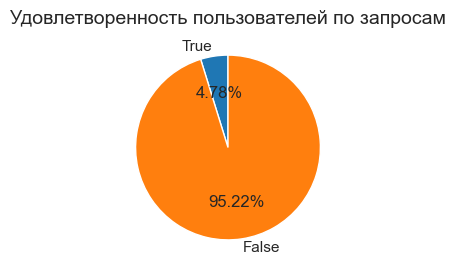

In [14]:
efficiency = (not_satisfied_users['user_id'].nunique() / df['user_id'].nunique()) * 100
# print(f"Процент неудовлетворенных пользователей: {efficiency:.2f}%")
other = 100 - efficiency 
labels = ['True', 'False']
sizes = [efficiency, other]
plt.figure(figsize=(3, 3))
plt.pie(
    sizes,
    labels=labels,
    autopct='%1.2f%%',
    startangle=90,
    colors=sns.color_palette('tab10')
)
plt.title('Удовлетворенность пользователей поиском', fontsize=14)
plt.show()

In [15]:
# Неудовлетворенные пользователи по категориям
not_satisfied_users['query_type'].value_counts().head()

query_type
show     477
films    467
music    455
news     309
Name: count, dtype: int64

## Рассмотрим подробнее тему, к которой относятся "неудачные" запросы и есть ли корреляция с возрастом

In [30]:
set(not_satisfied_users[not_satisfied_users['sex'] == 'anonym']['age'])

{0}

## Удалим всех анонимных пользователей, тк у них возраст всегда 0

In [40]:
print(f"Кол-во всех пользователей {not_satisfied_users['user_id'].nunique()}, Кол-во всех пользователей без ананонимных {not_satisfied_users[not_satisfied_users['sex'] != 'anonym']['user_id'].nunique()}")

Кол-во всех пользователей 779, Кол-во всех пользователей без ананонимных 746


In [41]:
search_data = not_satisfied_users[not_satisfied_users['sex'] != 'anonym'].copy()
age_bins = [0, 18, 25, 35, 45, 55, 70]
age_labels = ['0-18', '18-24', '25-34', '35-44', '45-54', '55+']
search_data['age_group'] = pd.cut(search_data['age'], bins=age_bins, labels=age_labels)
age_group_distribution = search_data['age_group'].value_counts().sort_values(ascending=False)
age_group_distribution

age_group
55+      319
45-54    209
35-44    203
25-34    191
0-18     175
18-24    164
Name: count, dtype: int64

In [54]:
search_data_corr = search_data.copy()
queries_per_user = search_data_corr.groupby('user_id').size().reset_index(name='query_count')
search_data_corr = search_data_corr.drop_duplicates(subset='user_id').merge(queries_per_user, on='user_id')
correlation_age_queries = search_data_corr[['age', 'query_count']].corr().iloc[0, 1]
print(f"Корреляция между возрастом и количеством запросов: {correlation_age_queries:.2f}")

Корреляция между возрастом и количеством запросов: 0.02


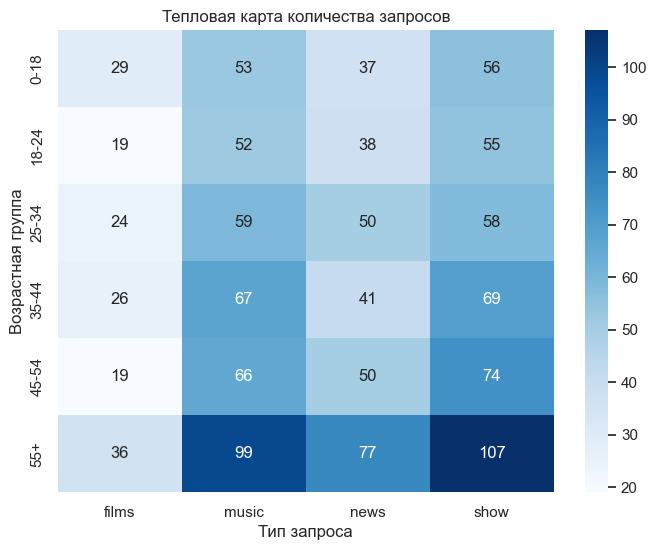

In [43]:
search_data_by_age_query_type = search_data.groupby(['age_group','query_type'], observed=False)['user_id'].count()
unstacked = search_data_by_age_query_type.unstack(level='query_type')
plt.figure(figsize=(8, 6))
sns.heatmap(unstacked, annot=True, fmt='d', cmap='Blues')
plt.title('Тепловая карта количества запросов')
plt.xlabel('Тип запроса')
plt.ylabel('Возрастная группа')
plt.show()

## Из анализа возрастных групп, неудовлетворенных поиском, можно сделать вывод, что по мере увеличения возраста кол-во запросов не значительно увеличивается, из группировки по возрастным диапозонам видно, что чем старше пользователи, тем чаще они неудовлетворены поиском. Чаще всего пользователи неудовлетворены поиском шоу, музыки и новостей

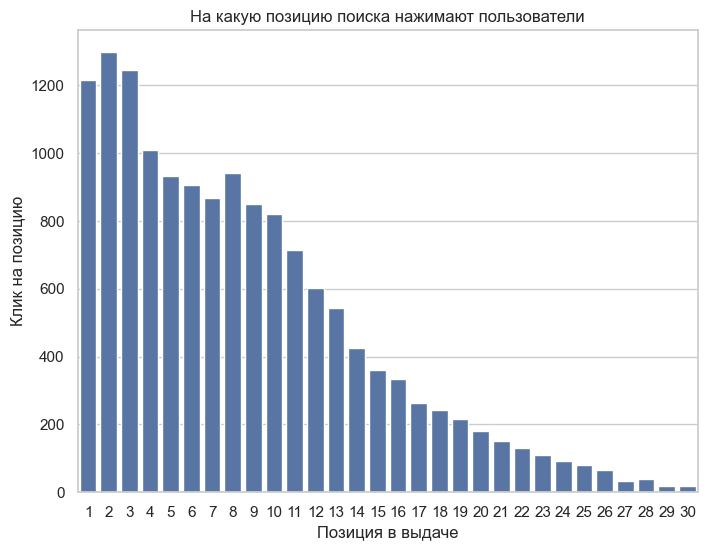

In [21]:
click_pos_tap = df[(df['event'] != 'search') & (df['click_position'] != 0)]['click_position'].value_counts()
click_pos_tap

plt.figure(figsize=(8, 6))
sns.barplot(x=click_pos_tap.index, y=click_pos_tap.values)
plt.title('На какую позицию поиска нажимают пользователи')
plt.xlabel('Позиция в выдаче')
plt.ylabel('Клик на позицию')
plt.show()

## Распределение хорошее, по нисходящей, но обратим внимание на 8ю позицию, возможно это выброс, но предположу, что это может быть связано с платформой и расположением элементов поиска на экране

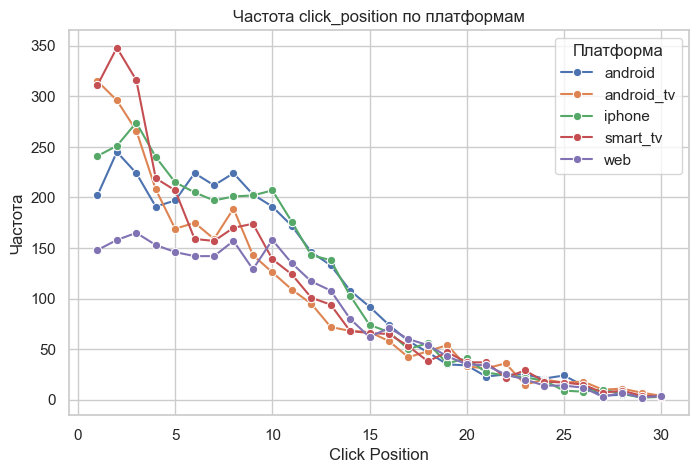

In [71]:
temp = df[(df['event'] != 'search') & (df['click_position'] != 0)]
# click_position_freq = temp.groupby(['platform'])['click_position'].value_counts().reset_index(name='frequency')
# click_position_freq = temp.groupby(['platform', 'click_position']).size().unstack(fill_value=0)
click_position_freq = temp.groupby(['platform', 'click_position']).size().reset_index(name='frequency')

plt.figure(figsize=(8, 5))
sns.lineplot(data=click_position_freq, x='click_position', y='frequency', hue='platform', marker='o')

# Настройка графика
plt.title('Частота click_position по платформам')
plt.xlabel('Click Position')
plt.ylabel('Частота')
plt.legend(title='Платформа')
plt.show()

## Из этого графика видно, что на платформах smart_tv, android и iphone большой разброс по кликам на первые 3 позиции, так же в районе 8 позиции в выдаче поиска есть скачок по платформам android_tv, web и небольшой по android. Сделаю гипотезу, что дело в размерах экрана и чтобы перейти на следующие страницы с результатами надо сделать дополнительное действие. Предложил бы коллегам из маркетинга распологать рекламу на этих платформах около 1-3 или 8 позиции выдачи поиска для соответстующих платформ.